<a href="https://colab.research.google.com/github/PanosRntgs/Machine-Learning/blob/main/Neural_Network_Digit_Classifier_with_Early_Stopping_(MNIST_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code shows the building, training, and evaluating of a neural network model for digit classification using the MNIST dataset. Here's a breakdown of the steps:

**Data Preprocessing:** The MNIST dataset is loaded and preprocessed. The images are normalized by dividing pixel values by 255 and flattened to be compatible with the neural network input.

**Model Construction:** A sequential neural network model is built using TensorFlow's Keras API. The model consists of multiple dense layers with ReLU activation functions, culminating in a softmax activation layer for classification.

**Model Compilation:** The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss function. Accuracy is chosen as the evaluation metric.

**Parameter Count:** The total number of trainable parameters in the model is printed to the console.

**Model Training:** The model is trained using the training data, with early stopping applied to prevent overfitting. Training progress is monitored for both training and validation sets, and the history of training loss and accuracy is stored.

**Training History Visualization:** The training and validation loss and accuracy are plotted over epochs to visualize the model's performance during training.

**Model Evaluation:** The trained model is evaluated on the test set to estimate its generalization performance. The test loss and accuracy are printed to the console.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
#1: Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Splitting into training (5/7) and a temporary set (2/7)
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=2/7, random_state=42)

In [4]:
# Splitting temp set into validation (1/7) and test (1/7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

In [5]:
#2: Build the neural network model
model = Sequential([
    Dense(50, activation='relu', input_shape=(784,)), #This line adds the first Dense layer to the model.
    Dense(50, activation='relu',), #  second Dense layer, input shape is takes automatically from now on.
    Dense(50, activation='relu',),  # third Dense layer
    Dense(10, activation='softmax') # final Dense layer
])

In [6]:
#3: Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#4: Number of trainable parameters
print("Number of trainable parameters:", model.count_params())

Number of trainable parameters: 44860


In [8]:
#5: Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/100
670/670 [==============================] - 10s 10ms/step - loss: 0.4074 - accuracy: 0.8820 - val_loss: 0.1994 - val_accuracy: 0.9436
Epoch 2/100
670/670 [==============================] - 8s 12ms/step - loss: 0.1738 - accuracy: 0.9492 - val_loss: 0.1604 - val_accuracy: 0.9541
Epoch 3/100
670/670 [==============================] - 3s 5ms/step - loss: 0.1321 - accuracy: 0.9608 - val_loss: 0.1346 - val_accuracy: 0.9592
Epoch 4/100
670/670 [==============================] - 3s 5ms/step - loss: 0.1058 - accuracy: 0.9680 - val_loss: 0.1317 - val_accuracy: 0.9611
Epoch 5/100
670/670 [==============================] - 4s 6ms/step - loss: 0.0890 - accuracy: 0.9732 - val_loss: 0.1135 - val_accuracy: 0.9665
Epoch 6/100
670/670 [==============================] - 3s 5ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.1208 - val_accuracy: 0.9645
Epoch 7/100
670/670 [==============================] - 3s 5ms/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.1074 - val_accuracy: 0.9

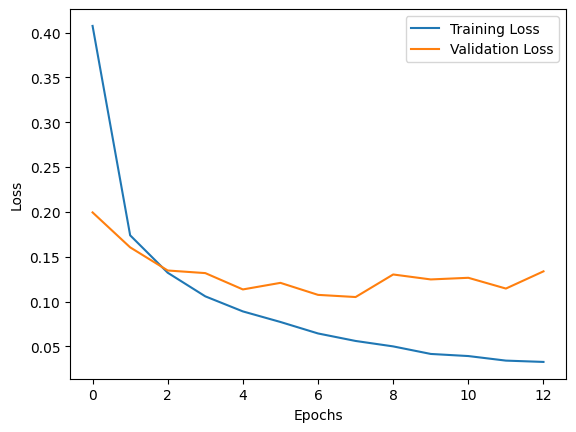

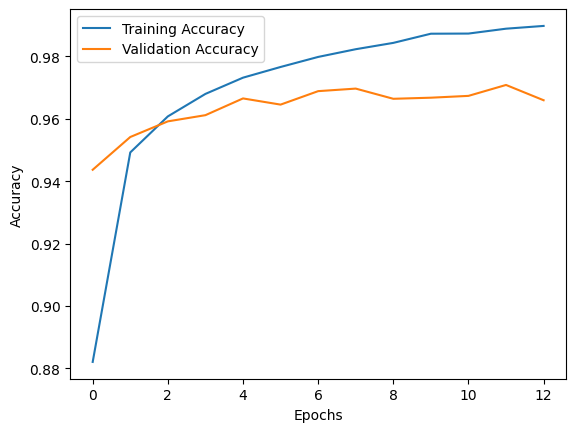

In [9]:
#6: Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
#7: showing the test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

268/268 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9661
Test Accuracy: 0.966052234172821
